# Problem Statement

BoomBikes, A US basedbike-sharing provider has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company aspires to understand the demand for shared bikes among the people in the American market after this ongoing quarantine situation ends across the nation due to Covid-19.

The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

In [1]:
# Importing all the required python libraries to perform EDA and build linear regression model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

# Step1: Reading and visualizing the dataset day.csv - EDA

In [2]:
# Reading the data 
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike[bike.holiday == 1]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16,17,17-01-2018,1,0,1,1,1,0,2,7.209153,8.83855,53.7500,12.999139,117,883,1000
51,52,21-02-2018,1,0,2,1,1,0,2,12.436653,14.20375,60.5000,20.625682,195,912,1107
104,105,15-04-2018,2,0,4,1,5,0,1,18.313347,22.09565,67.1250,15.167125,642,2484,3126
149,150,30-05-2018,2,0,5,1,1,0,1,30.066653,33.55460,68.5000,8.792075,1549,2549,4098
184,185,04-07-2018,3,0,7,1,1,0,2,29.793347,33.27085,63.7917,5.459106,3065,2978,6043
247,248,05-09-2018,3,0,9,1,1,0,2,27.606653,31.28230,79.0417,14.250632,1236,2115,3351
282,283,10-10-2018,4,0,10,1,1,0,1,23.404153,27.14625,73.3750,2.834381,1514,3603,5117
314,315,11-11-2018,4,0,11,1,5,0,1,13.290847,15.34085,44.6250,21.083225,440,2928,3368
327,328,24-11-2018,4,0,11,1,4,0,1,15.306653,18.62355,54.9167,11.209368,560,935,1495
359,360,26-12-2018,1,0,12,1,1,0,1,13.191299,15.77675,50.6957,16.044155,430,887,1317


In [4]:
#There are 16 columns
bike.shape

(730, 16)

In [5]:
#This tells us that there are no Null cells
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


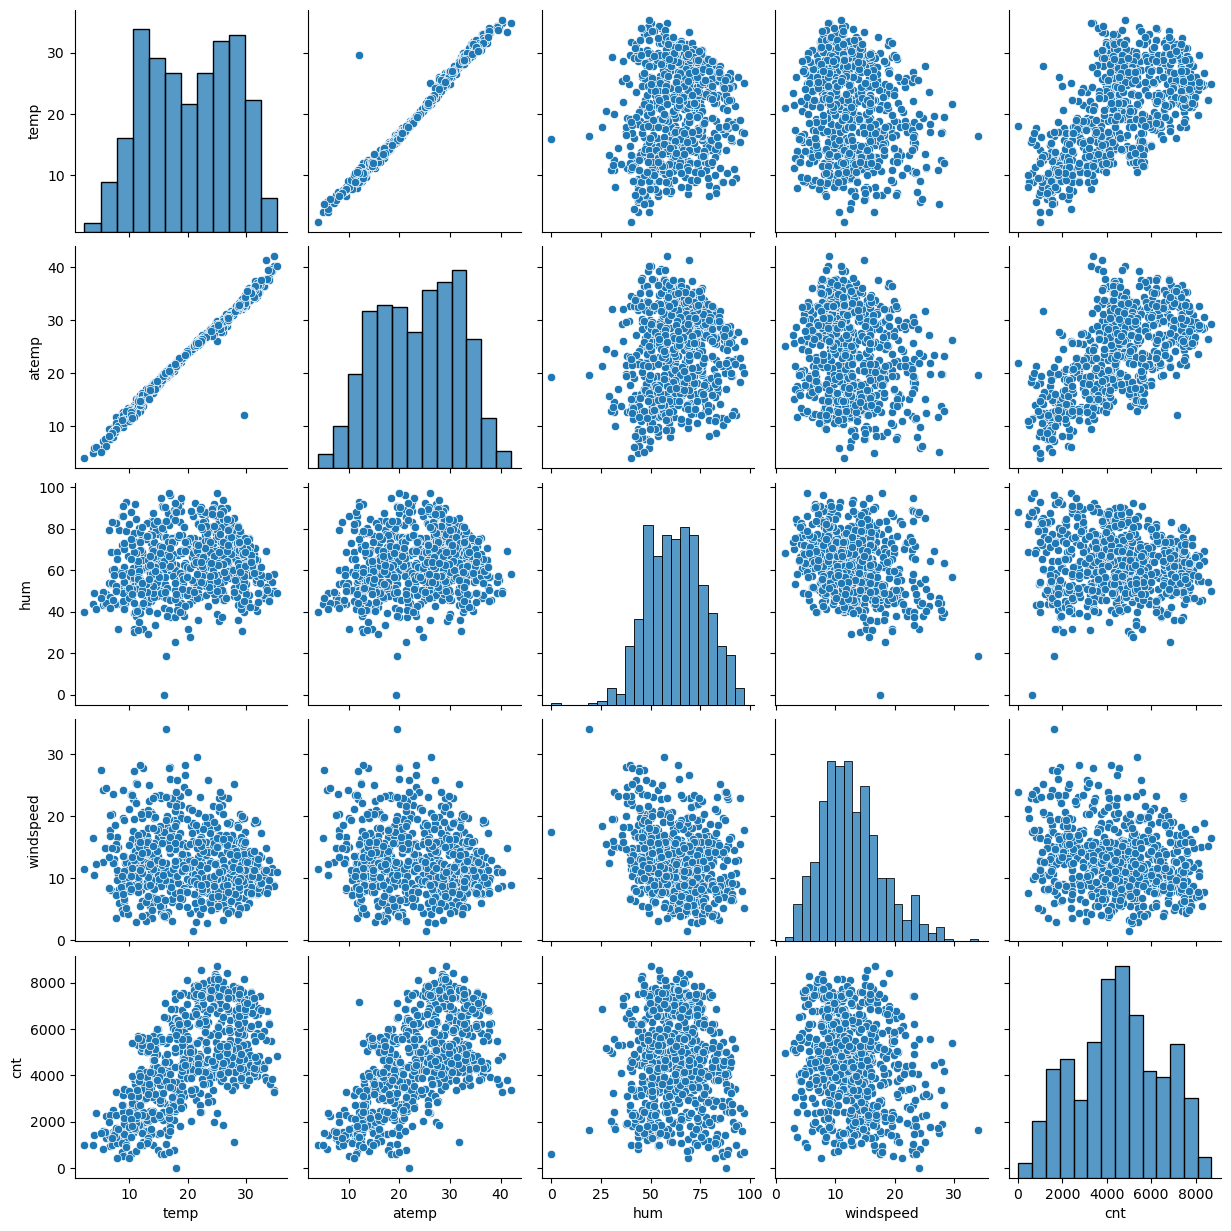

In [7]:
# Checking the pair plot for all the numerical variables - Bivariate analysis
num_var = ['temp','atemp','hum','windspeed','cnt']
sns.pairplot(bike[num_var])
plt.show()

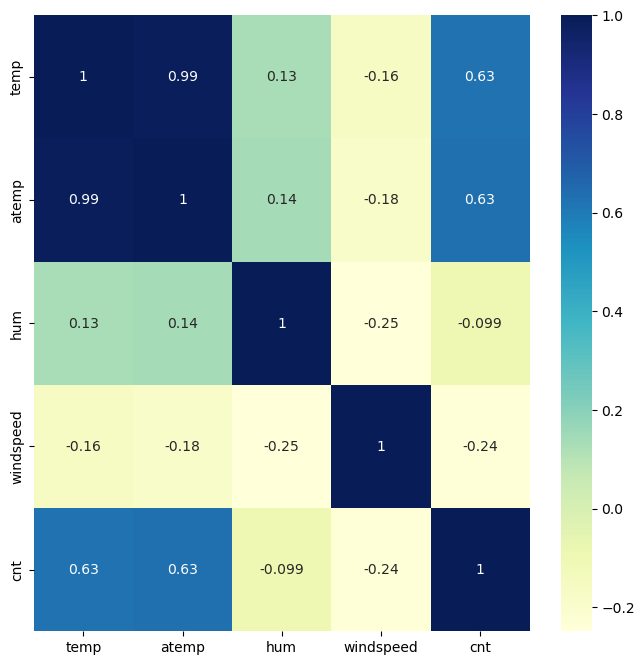

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(bike[num_var].corr(),annot=True,cmap='YlGnBu')
plt.show()

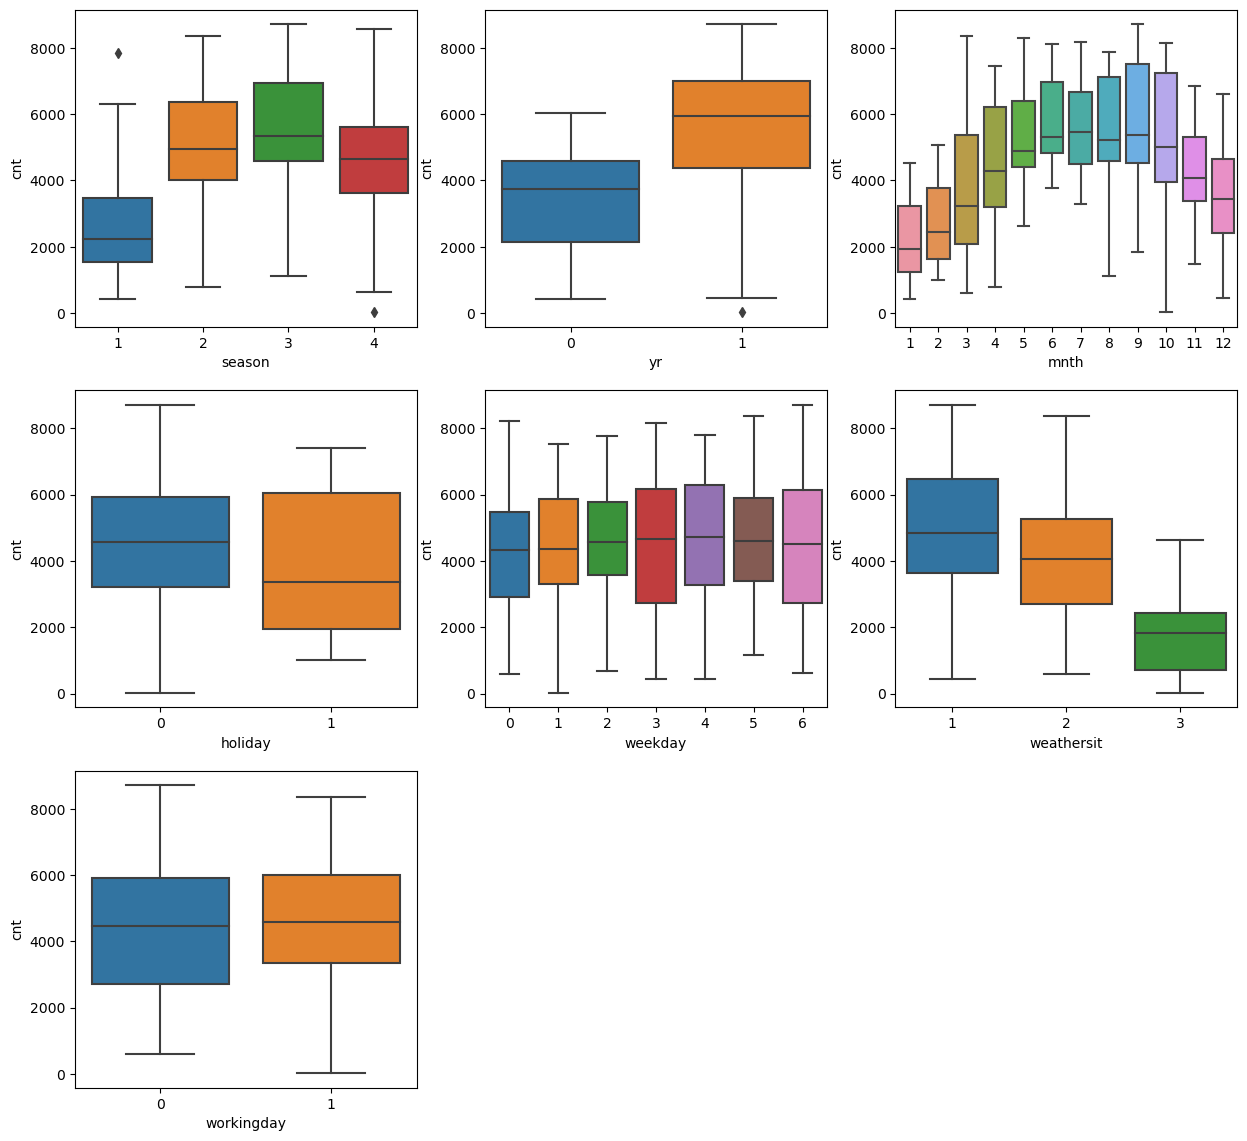

In [9]:
# Checking relationship with categorical variables season, year, mnth, holiday, weekday, workingday, weathersit - Bivariate analysis
plt.figure(figsize=(15,14))
plt.subplot(3,3,1)
sns.boxplot(data=bike,x='season',y='cnt')
plt.subplot(3,3,2)
sns.boxplot(data=bike,x='yr',y='cnt')
plt.subplot(3,3,3)
sns.boxplot(data=bike,x='mnth',y='cnt')
plt.subplot(3,3,4)
sns.boxplot(data=bike,x='holiday',y='cnt')
plt.subplot(3,3,5)
sns.boxplot(data=bike,x='weekday',y='cnt')
plt.subplot(3,3,6)
sns.boxplot(data=bike,x='weathersit',y='cnt')
plt.subplot(3,3,7)
sns.boxplot(data=bike,x='workingday',y='cnt')
plt.show()

### Analysis
1. Year 2019 has more no of users in comparison with 2018, so year by year there is an increase of user count. 
2. More number of users in holidays. Weekday further shows that on Saturday’s the user count is high.
3. `weathersit` shows that Clear sky has more number of users. Factors like mist, snow, fog, heavy rain, thunderstorm has less number of users.
4. `temp` and `atemp` are highly co-related and these two variables further displays linear corelaton between total number of user count. Pair plot shows that as the temperature has increased, number of users have also increased.
5. `windspeed` shows that user count has dropped with Windspeed above 25 km/h 
6. More number of users with high humidity above i.e. 40

### Dropping unwanted variables

In [10]:
#1. Dropping the instant column as this is a record index
bike.drop(['instant'], axis=1, inplace=True)

In [11]:
#Lets extract day from dteday
bike['Day'] = pd.DatetimeIndex(bike['dteday']).day

In [12]:
#2. Dropping this as year and month information is already present in seperate columns
bike.drop(['dteday'], axis=1, inplace=True)

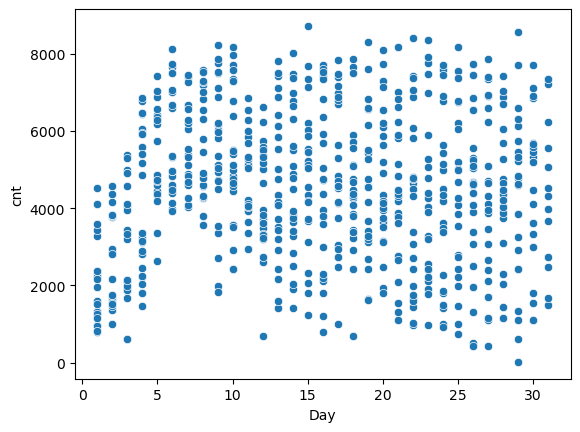

In [13]:
sns.scatterplot(data=bike,x='Day',y='cnt')
plt.show()

In [14]:
#3. This needs to be converted into dummy variable but we already have weekday where same information can be fetched, so dropping this column as well
bike.drop(['Day'], axis=1, inplace=True)

# Step 2: Preparation of the data

In [15]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


1. Convert season/weathersit/month/weekday to string and then convert to dummy variables.
2. Binary variables ( 0/1) are retained as it is.

In [16]:
# Following variables are binary : year, holiday, workingday
print(bike.holiday.value_counts())
print(bike.workingday.value_counts())
print(bike.yr.value_counts())

holiday
0    709
1     21
Name: count, dtype: int64
workingday
1    499
0    231
Name: count, dtype: int64
yr
0    365
1    365
Name: count, dtype: int64


In [17]:
# Lets map strings for weathersit, season, month and weekday

bike[['weathersit']] = bike[['weathersit']].apply(lambda x: x.map({1:'Clear_PartlyCloudy', 2:'Mist',3:'Light_Snow_Rain_Thunder', 4:'Heavy_Rain_Ice'}))
bike[['season']] = bike[['season']].apply(lambda x: x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))
bike[['mnth']] = bike[['mnth']].apply(lambda x: x.map({1:'Jan', 2:'Feb', 3:'March', 4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}))
bike[['weekday']] = bike[['weekday']].apply(lambda x: x.map({0:'Sun',1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu',5:'Fri',6:'Sat'}))

In [18]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Mon,1,Clear_PartlyCloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Tue,1,Clear_PartlyCloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Wed,1,Clear_PartlyCloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Creating dummy variables for season, weathersit, weekday and mnth

In [19]:
season = pd.get_dummies(data=bike.season, dtype=int, drop_first=True)
weather = pd.get_dummies(data=bike.weathersit,dtype=int,drop_first=True)
weekday = pd.get_dummies(data=bike.weekday, dtype=int, drop_first=True)
month = pd.get_dummies(data=bike.mnth, dtype=int, drop_first=True)

In [20]:
bike = pd.concat([bike,season],axis=1)
bike = pd.concat([bike,weather],axis=1)
bike = pd.concat([bike,weekday],axis=1)
bike = pd.concat([bike,month],axis=1)

In [21]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Mon,1,Clear_PartlyCloudy,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear_PartlyCloudy,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Wed,1,Clear_PartlyCloudy,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


In [22]:
# Dropping these columns
bike.drop(['season','weathersit','mnth','weekday'],axis=1, inplace=True)

In [23]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,1,0,0,0,0,0,0,0


In [24]:
#Total columns post adding dummy variables and removing raw category variables
bike.shape

(730, 32)

### Spliting the data into train and test

In [25]:
bike_train, bike_test = train_test_split(bike, random_state=100, train_size=0.70)

In [26]:
print(bike_train.shape)
print(bike_test.shape)

(510, 32)
(220, 32)


In [27]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.108257,23.500287,63.123710,12.834912,837.633333,3647.703922,4485.337255,...,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392
std,0.500429,0.157763,0.468282,7.431626,8.090963,14.153170,5.292031,675.936359,1578.410906,1950.666077,...,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,2.000000,20.000000,22.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,311.000000,2468.250000,3120.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.277923,24.131150,63.437500,12.083182,700.000000,3657.000000,4530.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,1076.250000,4841.000000,5973.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,3283.000000,6946.000000,8714.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Scaling the data into Min Max 0 - 1

In [28]:
# Continuous variables are only scaled. Binary variables are retained as it is.
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','casual','registered','cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [29]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,...,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0.191095,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#Notice that all the variables are having minimum 0 and maximum 1
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.254689,0.523781,0.513499,...,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.206015,0.227896,0.224421,...,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.212740,0.525123,0.518638,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


__Here we complete the data preparation and proceed with modeling__

## Step 3: Training the model

With CNT following variables shows decent co-relation:
    1. temp, atemp, Clear Partly cloudy, 
    2. spring, 

In [31]:
bike_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'spring', 'summer', 'winter',
       'Light_Snow_Rain_Thunder', 'Mist', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue',
       'Wed', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'March', 'May',
       'Nov', 'Oct', 'Sept'],
      dtype='object')

In [32]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [33]:
X_train_sm = sm.add_constant(X_train)

lr_model = sm.OLS(y_train,X_train_sm).fit()

In [34]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.671e+30
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:25:23   Log-Likelihood:                 17078.
No. Observations:                 510   AIC:                        -3.409e+04
Df Residuals:                     479   BIC:                        -3.396e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    4

__The r2 is 1 and model is overfitted and this is because of keeping reg/casual. This is part of target variable, so this needs to be dropped__

In [35]:
# As CNT is sum of casual and registered, having these variables in X_train set will impact the significance index

X_train.drop(['casual','registered'],axis=1,inplace=True)

X_train_sm = sm.add_constant(X_train)

lr_model = sm.OLS(y_train,X_train_sm).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          2.81e-180
Time:                        13:25:23   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [36]:
# Checking VIF for the remaining independent variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [ variance_inflation_factor(X_train,i) for i in range(X_train.shape[1])]
vif.sort_values('VIF',ascending=False, inplace=True)
vif

,Features,VIF
2,workingday,85.557802
3,temp,66.896825
4,atemp,56.027582
13,Sat,19.708035
14,Sun,18.342515
7,spring,10.765395
9,winter,9.461499
8,summer,8.291722
26,Nov,6.788200
18,Aug,6.469361


#### We notice a huge difference in the r2 and adjusted r2 post removing registered and casual variables. Further we shall drop the variables using RFE

In [37]:
# An arbitrary number 12 features is fed to RFE

lm = LinearRegression()

rfe = RFE(lm, n_features_to_select=12)
rfe.fit(X_train,y_train)


RFE(estimator=LinearRegression(), n_features_to_select=12)

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light_Snow_Rain_Thunder', True, 1),
 ('Mist', True, 1),
 ('Mon', False, 12),
 ('Sat', False, 2),
 ('Sun', False, 11),
 ('Thu', False, 14),
 ('Tue', False, 13),
 ('Wed', False, 15),
 ('Aug', False, 10),
 ('Dec', False, 6),
 ('Feb', False, 7),
 ('Jan', False, 4),
 ('July', True, 1),
 ('June', False, 17),
 ('March', False, 18),
 ('May', False, 9),
 ('Nov', False, 5),
 ('Oct', False, 16),
 ('Sept', True, 1)]

In [39]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Light_Snow_Rain_Thunder', 'Mist', 'July', 'Sept'],
      dtype='object')

In [40]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,Light_Snow_Rain_Thunder,Mist,July,Sept
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,1,0,0
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,1,0,0


In [41]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr_model_rfe = sm.OLS(y_train, X_train_rfe_sm).fit()
print(lr_model_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          2.95e-190
Time:                        13:25:23   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [42]:
# Checking VIF 
vif = pd.DataFrame()
vif['Independent Variables'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif.VIF,2)
vif.sort_values(by='VIF', ascending=False,inplace=True)
vif

,Independent Variables,VIF
3,hum,28.03
2,temp,16.03
4,windspeed,4.65
5,spring,4.01
7,winter,3.33
6,summer,2.79
9,Mist,2.28
0,yr,2.08
10,July,1.58
11,Sept,1.38


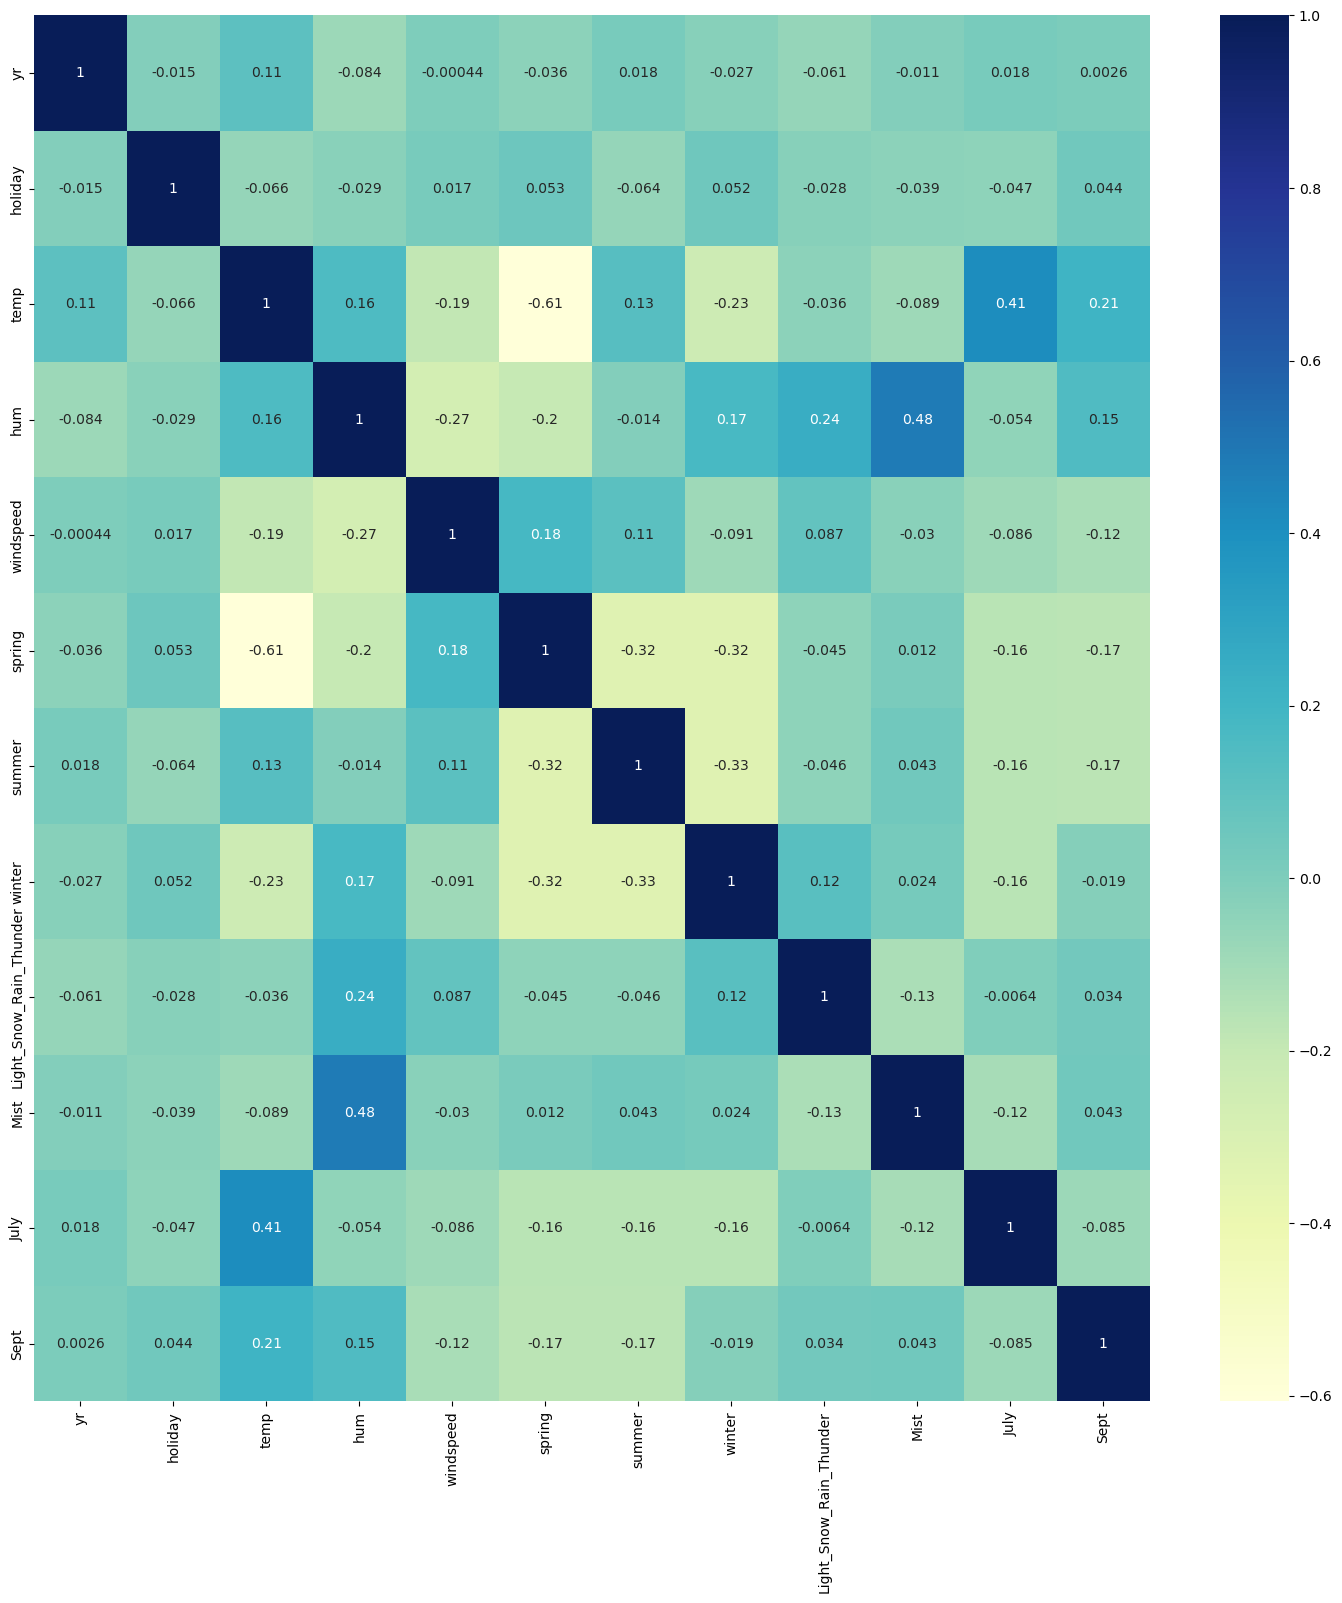

In [43]:
plt.figure(figsize=(18,18))
sns.heatmap(X_train_rfe.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [44]:
#P-value for all the features are less than 0.05. Removing humidity as the VIF score is high 28.03
X_train_rfe = X_train_rfe.drop(['hum'],axis=1)

X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr_model_rfe = sm.OLS(y_train, X_train_rfe_sm).fit()
print(lr_model_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          5.06e-187
Time:                        13:25:24   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [45]:
vif = pd.DataFrame()
vif['Independent Variables'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif.VIF,2)
vif.sort_values(by='VIF', ascending=False,inplace=True)
vif

,Independent Variables,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,yr,2.07
6,winter,1.78
9,July,1.58
8,Mist,1.55
10,Sept,1.34
7,Light_Snow_Rain_Thunder,1.08


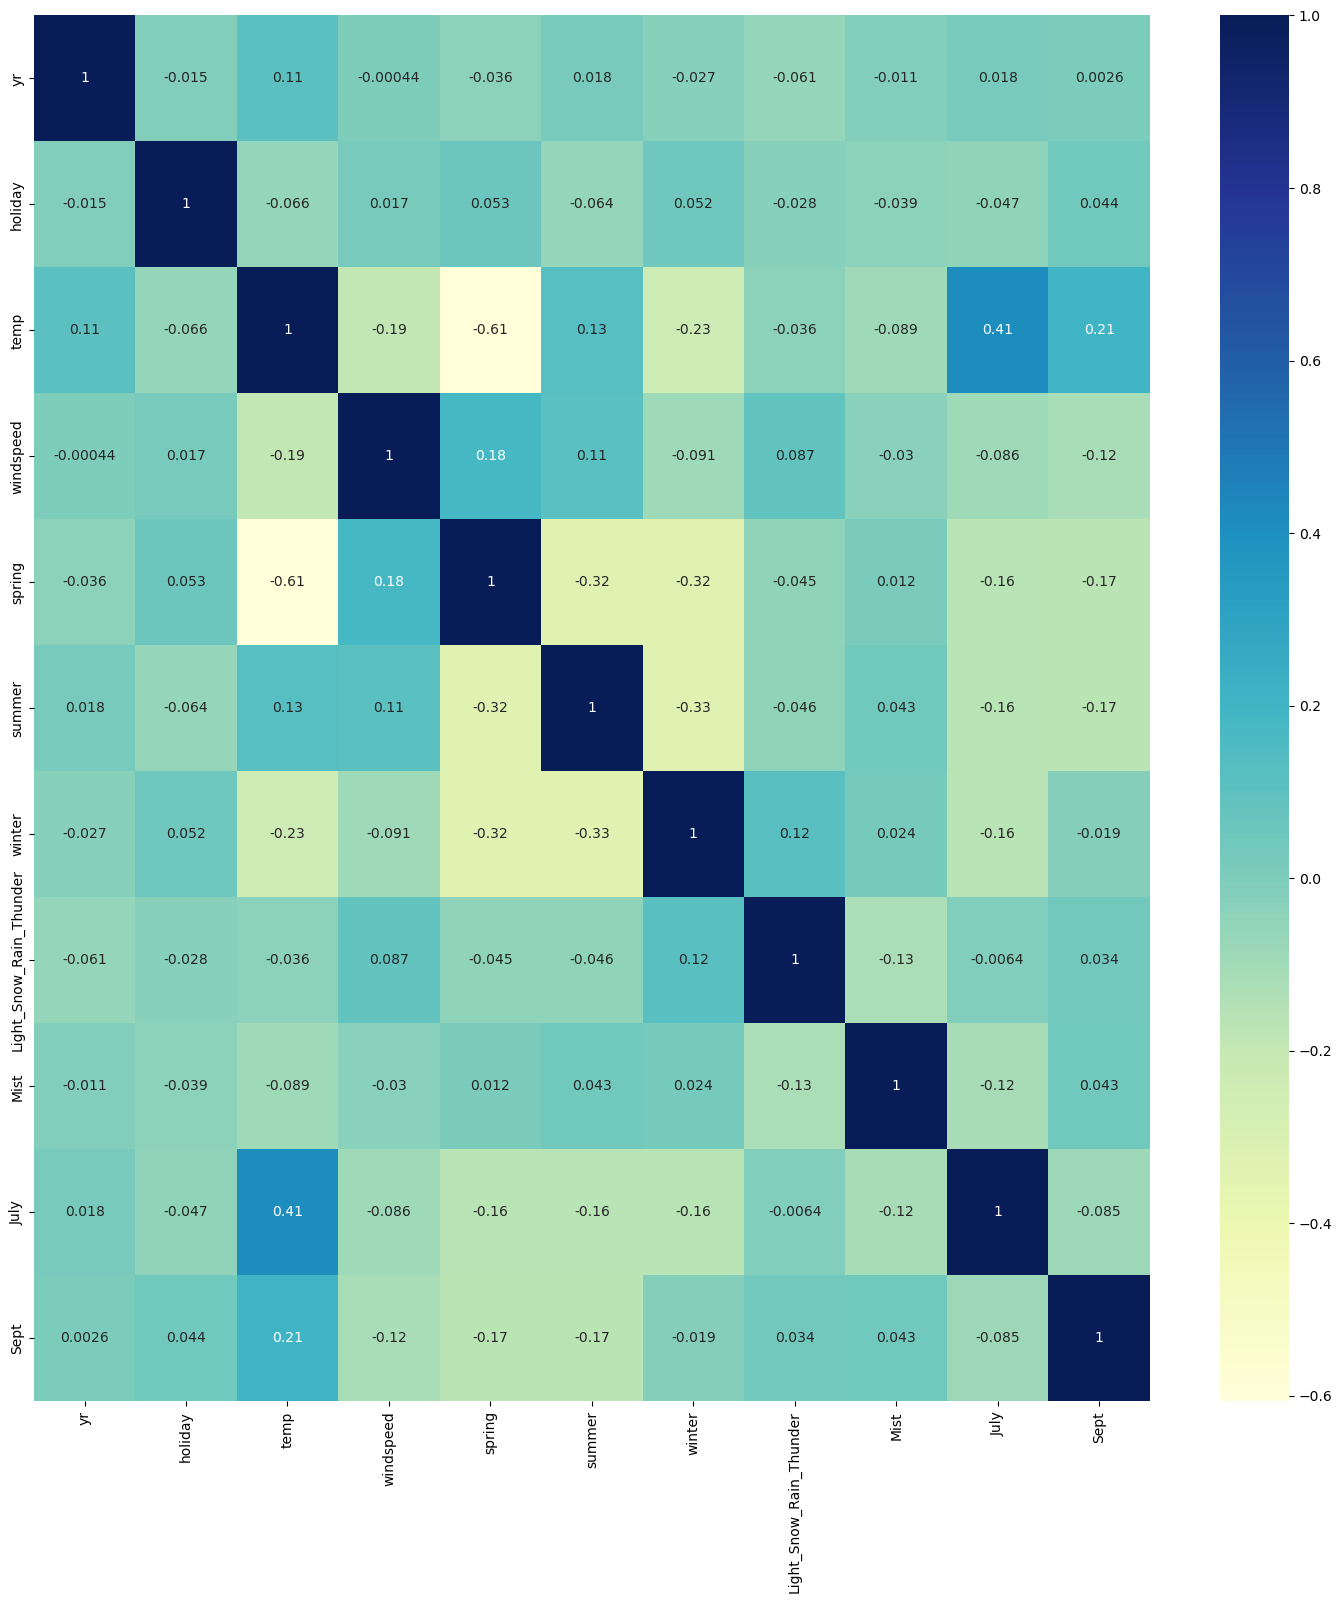

In [46]:
plt.figure(figsize=(18,18))
sns.heatmap(X_train_rfe.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [47]:
#Lets remove July that is co-related with temp
X_train_rfe = X_train_rfe.drop(['July'],axis=1)

X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr_model_rfe = sm.OLS(y_train, X_train_rfe_sm).fit()
print(lr_model_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          1.47e-186
Time:                        13:25:24   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [48]:
#Checking VIF post removing July
vif = pd.DataFrame()
vif['Independent Variables'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif.VIF,2)
vif.sort_values(by='VIF', ascending=False,inplace=True)
vif

,Independent Variables,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
8,Mist,1.55
9,Sept,1.23
7,Light_Snow_Rain_Thunder,1.08
1,holiday,1.04


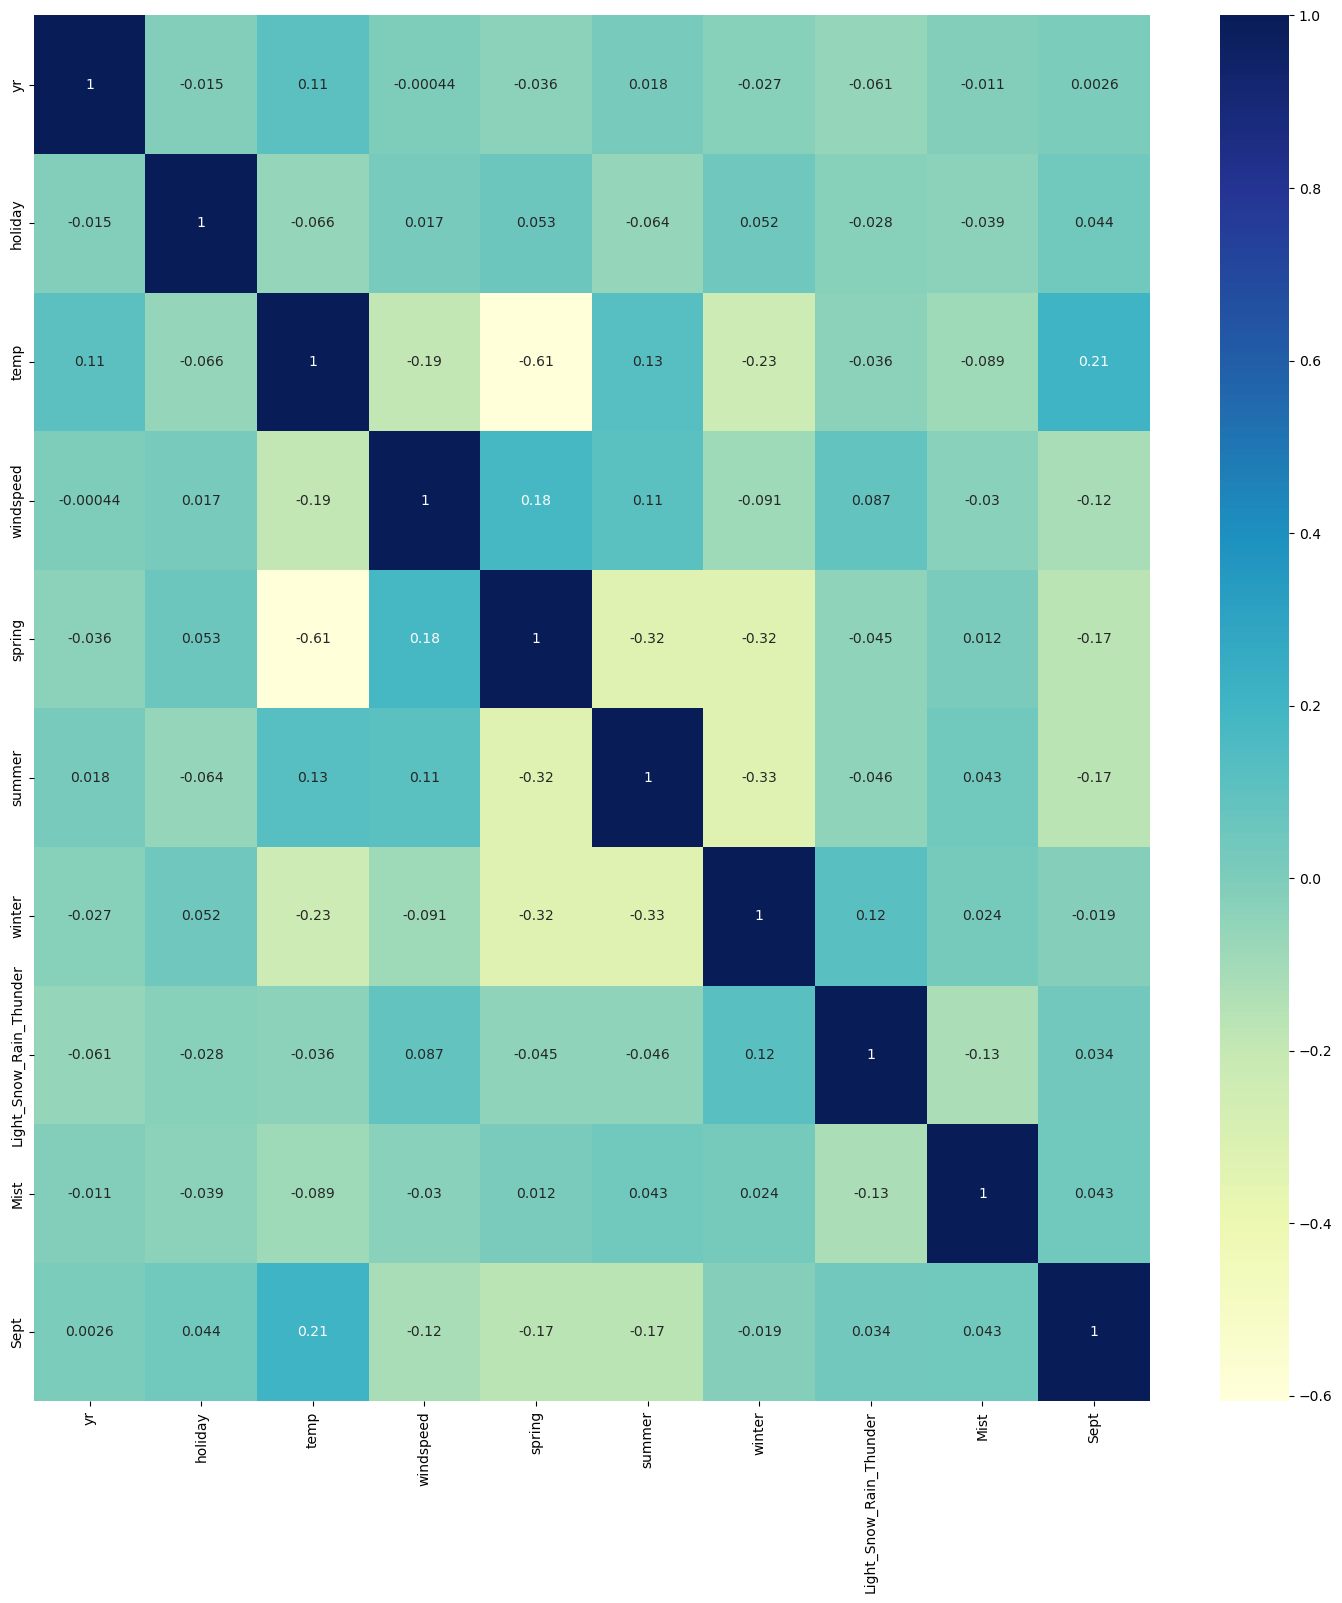

In [49]:
plt.figure(figsize=(18,18))
sns.heatmap(X_train_rfe.corr(),annot=True,cmap='YlGnBu')
plt.show()

### This will be the final model `lr_model_rfe` with r2 83.3 and adjusted r2 82.9


# Step 4: Residual analysis

In [50]:
# Analysis with model lr_model_rfe with r2 83.3% 
X_train_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,...,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept
576,1.0,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1.0,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,...,0,0,0,0,0,0,0,0,0,0
111,1.0,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#Above independent variables are fed to the model lr_model
y_train_pred = lr_model_rfe.predict(X_train_rfe_sm)

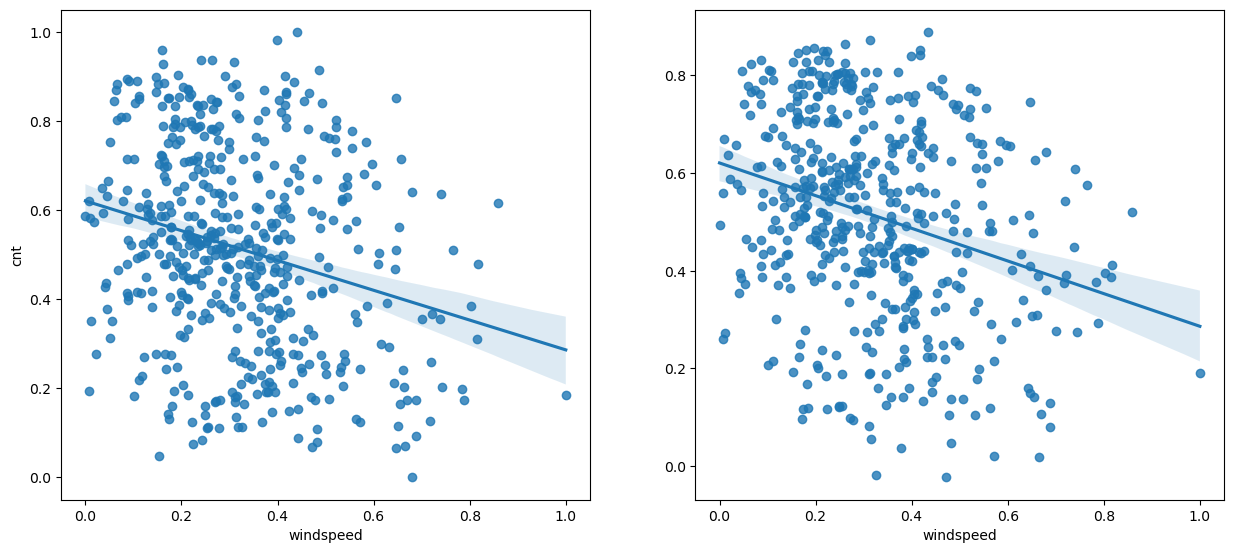

In [52]:
#Comparing y train vs y pred for one of the variable say windspeed
plt.figure(figsize=(15,14))
plt.subplot(2,2,1)
sns.regplot(x=X_train_sm['windspeed'],y=y_train)
plt.subplot(2,2,2)
sns.regplot(x=X_train_sm['windspeed'],y=y_train_pred)
plt.show()

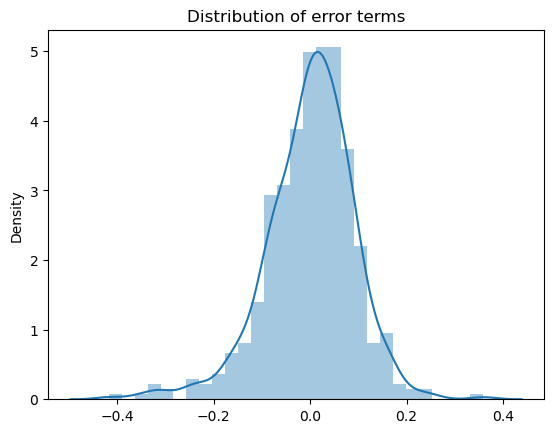

In [53]:
res = y_train - y_train_pred
sns.distplot(res)
plt.title('Distribution of error terms')
plt.show()

Note: There is small peak between -0.2 and -0.4

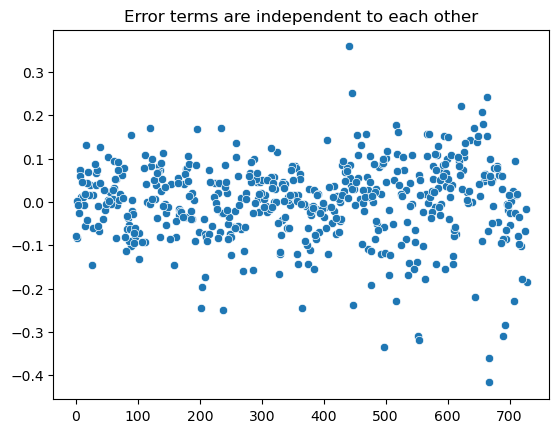

In [54]:
sns.scatterplot(res)
plt.title('Error terms are independent to each other')
plt.show()

# Step 4: Evaluating the predicted model on the test set

In [55]:
# Lets scale the test set 

num_vars = ['temp','atemp','hum','windspeed','casual','registered','cnt']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,0.692706,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,0.712034,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,0.303382,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630,0.547400,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143,0.569029,...,0,0,0,0,1,0,0,0,0,0


In [56]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.266436,0.529076,0.522154,...,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.216751,0.219300,0.219163,...,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.002133,0.059486,0.048205,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.102484,0.359190,0.378595,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.225236,0.527577,0.524678,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.361780,0.667088,0.677750,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.038708,0.985273,0.963300,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
y_test =  bike_test.pop('cnt')
X_test = bike_test

In [58]:
# Lets remove the variables corresponding lr_model
X_test_1st = X_test.drop(['casual','registered','workingday','atemp','hum','Jan','Feb','March','May','June','July','Aug','Oct','Nov','Dec','Sun','Sat','Mon','Tue','Wed','Thu'], axis=1)

In [59]:
X_test_1st.head()

,yr,holiday,temp,windspeed,spring,summer,winter,Light_Snow_Rain_Thunder,Mist,Sept
184,0,1,0.831783,0.084219,0,0,0,0,1,0
535,1,0,0.901354,0.153728,0,1,0,0,0,0
299,0,0,0.511964,0.334206,0,0,1,0,1,0
221,0,0,0.881625,0.339570,0,0,0,0,0,0
152,0,0,0.817246,0.537414,0,1,0,0,0,0


In [60]:
X_test_1st.shape

(220, 10)

In [61]:
X_test_1st = sm.add_constant(X_test_1st)

In [62]:
y_test_pred = lr_model_rfe.predict(X_test_1st)
testscore = r2_score(y_true=y_test,y_pred=y_test_pred)
print('This is r2 on test set',round(testscore,3))

This is r2 on test set 0.804


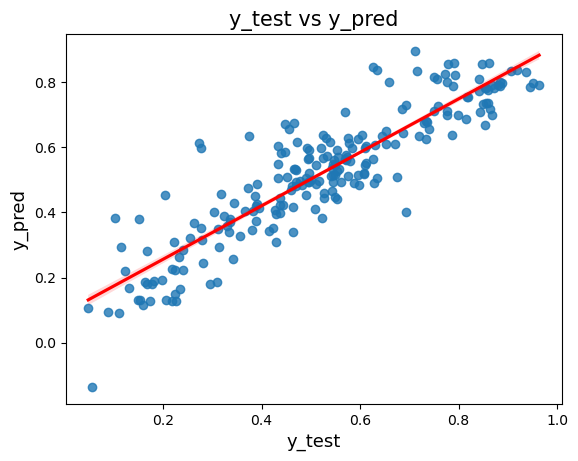

In [63]:
#Checking the fit over y test vs y pred
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=15)
plt.xlabel('y_test', fontsize=13)
plt.ylabel('y_pred', fontsize=13)
plt.show()

### The r2 is 80.4 on test set and on trian set it is 83.3 with lr_model_rfe. The difference is less than 5%


__Demand for the bikes depends on following independent features temp, holiday, windspeed, year, September, Spring, Summer, Winter, Mist, weathersit -3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) as per built model `lr_model_rfe`__

### Conclusion:
1. Company should focus on expanding buisness in September
2. Company can provide offers during weekends/holidays as the users count is high these days
3. During Adverse weather conditions user count is too low, company can focus on vechile maintainence. 
4. Year by year the user count has increased, so this might give a clue that post pandamic situation can improve.